$$
f(x, y) = x^2 + x^6 − 4 x y + y^2 − 4 x^3 y^2 + 2 y^4\\
f(x, y) = x^2 + x^6 − x y + y^2 − x^3 y^2 + 2 y^4\\
\text{Вариант } 107
$$

In [1]:
from math import exp, sqrt
import numpy as np

def f(x, y):
    return x**2 + x**6 - 1*x*y + y**2 - 1*x**3*y**2 + 2*y**4

def grad(x, y):
    return (2*(3*x**5 - 6/4*x**2*y**2 + x - 1/2*y), -2*x**3*y - x + 8*y**3 + 2*y)

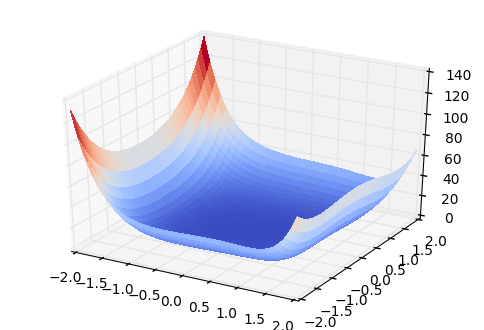

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-2, 2, 0.01)
Y = np.arange(-2, 2, 0.01)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

## Одномерная минимизация

In [3]:
def binSearch(f, a, b, eps):
    delta = eps / 2
    while (b - a) / 2 > eps:
        c = (a + b) / 2 - delta / 2
        d = (a + b) / 2 + delta / 2
        if f(c) <= f(d):
            b = d
        else:
            a = c
    return (a + b) / 2

## Покоординатный спуск

In [4]:
def coordinate_descent(f, x0, x1, y0, y1, eps):
    x = (x0 + x1) / 2
    y = (y0 + y1) / 2
    while True:
        new_y = binSearch(lambda y : f(x, y),     y0, y1, eps / 2)
        new_x = binSearch(lambda x : f(x, new_y), x0, x1, eps / 2)
        if sqrt((x - new_x) ** 2 + (y - new_y) ** 2) < eps:
            return (new_x, new_y)
        x = new_x
        y = new_y

###### Пример

In [5]:
coordinate_descent(lambda x, y: (x - 5) ** 2 + (y + 3) ** 2, -10, 10, -10, 10, 1e-13)

(5.000000000000028, -3.0000000000000036)

###### Запуск

In [6]:
coordinate_descent(f, -5, 3, -5, 3, 1e-10)

(-3.222888622635764e-11, -3.222888622635764e-11)

## Градиентный спуск

In [7]:
def gradient_descent(f, grad, x, y, eps):
    while True:
        x_grad = grad(x, y)
        alpha = binSearch(lambda alpha: f(x - alpha * x_grad[0],
                                          y - alpha * x_grad[1]),
                          0, 0.1, eps / 2)
        new_x, new_y = x - alpha * x_grad[0], y - alpha * x_grad[1]
        if sqrt((x - new_x) ** 2 + (y - new_y) ** 2) < eps:
            return (new_x, new_y)
        x, y = new_x, new_y

###### Запуск

In [8]:
gradient_descent(f, grad, -1, -1, 1e-10)

(-6.348960121706302e-10, -6.3489601217063e-10)

## Минимум

In [9]:
f(-6.348960121706302e-10, -6.3489601217063e-10)

4.0309294627016894e-19